In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel

In [2]:
svc = SVC()
minMax = MinMaxScaler()
norm = Normalizer()
stdSc = StandardScaler()
robustSc = RobustScaler()
maxAbs = MaxAbsScaler()

In [3]:
file = open('ClaMP_Integrated.csv')
df = pd.read_csv(file, encoding='utf-8')

In [5]:
pt = df['packer_type'].unique()
p_types = {pt[i] : i for i in range(len(pt))}

In [6]:
temp = []
for t in df['packer_type']:
    temp.append(p_types[t])
df['pt_num'] = temp
cl = df.pop('class')
df.pop('packer_type')
x_train, x_test, y_train, y_test = train_test_split(df, cl, random_state=0)

In [24]:
X_train_minmaxSc = minMax.fit_transform(x_train)
X_test_minmaxSc = minMax.transform(x_test)

X_train_norm = norm.fit_transform(x_train)
X_test_norm = norm.transform(x_test)

X_train_std = stdSc.fit_transform(x_train)
X_test_std = stdSc.transform(x_test)

X_train_robust = robustSc.fit_transform(x_train)
X_test_robust = robustSc.transform(x_test)

X_train_maxAbs = maxAbs.fit_transform(x_train)
X_test_maxAbs = maxAbs.transform(x_test)

y_tr_minmax = X_train_minmaxSc[:, 66]
y_tr_std = X_train_std[:, 66]
y_tr_robust = X_train_robust[:, 66]
y_tr_maxAbs = X_test_maxAbs[:, 66]
y_tr_norm = X_train_norm[:, 66]
y_tr = pd.DataFrame.to_numpy(x_train)[:, 66]
x = np.arange(1, 20)

y_t_minmax = X_test_minmaxSc[:, 66]
y_t_std = X_test_std[:, 66]
y_t_robust = X_test_robust[:, 66]
y_t_maxAbs = X_test_maxAbs[:, 66]
y_t_norm = X_test_norm[:, 66]
y_t = pd.DataFrame.to_numpy(x_test)[:, 66]
x = np.arange(1, 21)

print(x)
print(len(x))
print(y_tr[:20])
print(len(y_tr[:20]))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
20
[7.46421454 7.64196901 4.94290746 6.90995453 7.87127401 7.80579433
 5.88229437 5.63617813 5.42781771 4.93404002 7.65483076 7.73562736
 5.93614946 7.9098318  6.36231149 5.88479228 7.9760642  7.95620869
 6.06303787 7.66250715]
20


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

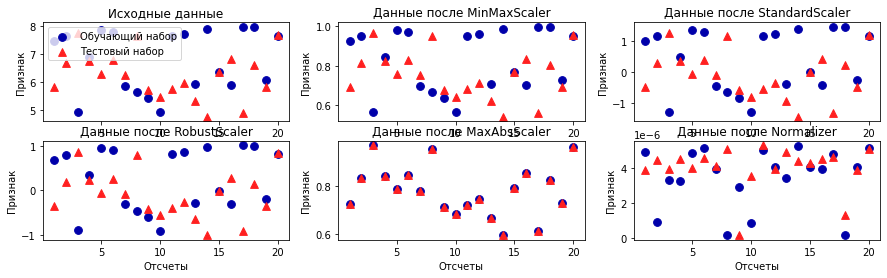

In [25]:
fig, axes = plt.subplots(2, 3, figsize = (15, 4), )

axes[0][0].scatter(x, y_tr[:20], c = mglearn.cm2(0), label = "Обучающий набор", s=60)
axes[0][0].scatter(x, y_t[:20], c = mglearn.cm2(1), marker='^', 
    label = "Тестовый набор", s=60)
axes[0][0].legend(loc = "upper left")
axes[0][0].set_title('Исходные данные')

axes[0][1].scatter(x, y_tr_minmax[:20], c = mglearn.cm2(0), 
    label = "Обучающий набор", s=60)
axes[0][1].scatter(x, y_t_minmax[:20], c = mglearn.cm2(1), marker='^', 
    label = "Тестовый набор", s=60)
axes[0][1].set_title('Данные после MinMaxScaler')

axes[0][2].scatter(x, y_tr_std[:20], c = mglearn.cm2(0), 
    label = "Обучающий набор", s=60)
axes[0][2].scatter(x, y_t_std[:20], c = mglearn.cm2(1), marker='^', 
    label = "Тестовый набор", s=60)
axes[0][2].set_title('Данные после StandardScaler')

axes[1][0].scatter(x, y_tr_robust[:20], c = mglearn.cm2(0), 
    label = "Обучающий набор", s=60)
axes[1][0].scatter(x, y_t_robust[:20], c = mglearn.cm2(1), marker='^', 
    label = "Тестовый набор", s=60)
axes[1][0].set_title('Данные после RobustScaler')

axes[1][1].scatter(x, y_tr_maxAbs[:20], c = mglearn.cm2(0), 
    label = "Обучающий набор", s=60)
axes[1][1].scatter(x, y_t_maxAbs[:20], c = mglearn.cm2(1), marker='^', 
    label = "Тестовый набор", s=60)
axes[1][1].set_title('Данные после MaxAbsScaler')

axes[1][2].scatter(x, y_tr_norm[:20], c = mglearn.cm2(0), 
    label = "Обучающий набор", s=60)
axes[1][2].scatter(x, y_t_norm[:20], c = mglearn.cm2(1), marker='^', 
    label = "Тестовый набор", s=60)
axes[1][2].set_title('Данные после Normalizer')

for ax in axes:
    for a in ax:
        a.set_xlabel('Отсчеты')
        a.set_ylabel('Признак')

In [7]:
svc.fit(x_train, y_train)
print('Правильность на исходном наборе: {:.4f}'.format(
    svc.score(x_test, y_test)
))

svc.fit(X_train_minmaxSc, y_train)
print('Правильность после MinMaxScaler: {:.4f}'.format(
    svc.score(X_test_minmaxSc, y_test)
))

svc.fit(X_train_norm, y_train)
print('Правильность после Normalizer: {:.4f}'.format(
    svc.score(X_test_norm, y_test)
))

svc.fit(X_train_std, y_train)
print('Правильность после StandardScaler: {:.4f}'.format(
    svc.score(X_test_std, y_test)
))

svc.fit(X_train_robust, y_train)
print('Правильность после RobustScaler: {:.4f}'.format(
    svc.score(X_test_robust, y_test)
))

svc.fit(X_train_maxAbs, y_train)
print('Правильность после MaxAbsScaler: {:.4f}'.format(
    svc.score(X_test_maxAbs, y_test)
))

Правильность на исходном наборе: 0.5510
Правильность после MinMaxScaler: 0.9371
Правильность после Normalizer: 0.8058
Правильность после StandardScaler: 0.9601
Правильность после RobustScaler: 0.6953
Правильность после MaxAbsScaler: 0.9355


In [8]:
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

print('Наилучшая модель:{}'.format(grid_search.best_estimator_))

print('Правильность на исходном наборе: {:.3f}'.format(
    grid_search.score(x_test, y_test)))

grid_search.fit(X_train_minmaxSc, y_train)
print('Правильность после MinMaxScaler: {:.3f}'.format(
    grid_search.score(X_test_minmaxSc, y_test)))

grid_search.fit(X_train_norm, y_train)
print('Правильность после Normalizer: {:.3f}'.format(
    grid_search.score(X_test_norm, y_test)))

grid_search.fit(X_train_std, y_train)
print('Правильность после StandartScaler: {:.3f}'.format(
    grid_search.score(X_test_std, y_test)))

grid_search.fit(X_train_robust, y_train)
print('Правильность после RobustScaler: {:.3f}'.format(
    grid_search.score(X_test_robust, y_test)))

grid_search.fit(X_train_maxAbs, y_train)
print('Правильность после MaxAbsScaler: {:.3f}'.format(
    grid_search.score(X_test_maxAbs, y_test)))

Наилучшая модель:SVC(C=1, gamma=0.001)
Правильность на исходном наборе: 0.612
Правильность после MinMaxScaler: 0.975
Правильность после Normalizer: 0.906
Правильность после StandartScaler: 0.982
Правильность после RobustScaler: 0.968
Правильность после MaxAbsScaler: 0.972


Index(['e_cblp', 'e_cp', 'e_cparhdr', 'e_maxalloc', 'e_sp', 'e_lfanew',
       'NumberOfSections', 'CreationYear', 'FH_char0', 'FH_char1', 'FH_char2',
       'FH_char3', 'FH_char4', 'FH_char5', 'FH_char6', 'FH_char7', 'FH_char8',
       'FH_char9', 'FH_char10', 'FH_char11', 'FH_char12', 'FH_char13',
       'FH_char14', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'OH_DLLchar0', 'OH_DLLchar1',
       'OH_DLLchar2', 'OH_DLLchar3', 'OH_DLLchar4', 'OH_DLLchar5',
       'OH_DLLchar6', 'OH_DLLchar7', 'OH_DLLchar8', 'OH_DLLchar9',
       'OH_DLLchar10', 'SizeOfStackReserve', 'SizeO

Text(0.5, 0, 'Индекс примера')

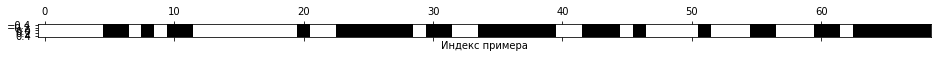

In [9]:
print(df.columns)
selectedModel = SelectFromModel(RandomForestClassifier(n_estimators=500, max_depth=100), threshold = 'median')
selectedModel.fit(x_train, y_train)
selectedModel.transform(x_train)
mask = selectedModel.get_support()

mask = mask.reshape(1, -1)
plt.matshow(mask, fignum=3, cmap='gray_r')
print(mask.shape)
plt.xlabel('Индекс примера')